In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data from Our World in Data (https://ourworldindata.org/grapher/ghg-emissions-by-sector)
df = pd.read_csv('../data/ghg-emissions-by-sector.csv')

df_grouped = (
    df
    .drop(columns=["Entity", "Code"])
    .groupby('Year')
    .sum()
    .rename(columns={
        "Fugitive emissions of greenhouse gases from energy production": "Fugitive emissions",
        "Greenhouse gas emissions from bunker fuels": "Aviation and shipping",
    })
    / 1e9 / 4 # Billion tons
)
df_grouped = df_grouped 

df_grouped.head()

,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions,Greenhouse gas emissions from other fuel combustion,Aviation and shipping
Year,,,,,,,,,,,
1990,5.103045,1.974222,1.405378,3.022605,1.003405,4.122407,4.393257,8.945435,2.147810,0.789403,0.654970
1991,5.087140,1.974200,1.436925,3.055462,1.007332,4.028227,4.425843,9.077617,2.174105,0.790747,0.663222
1992,5.060478,1.974187,1.460528,2.932812,1.067248,3.879185,4.506755,9.224840,2.174720,0.704818,0.698305
1993,5.026138,1.974625,1.486790,3.001380,1.082285,3.825160,4.554328,9.252643,2.198420,0.717810,0.690268
1994,5.067372,1.974263,1.513243,2.903500,1.194128,3.845250,4.631438,9.354605,2.206520,0.688478,0.714612


/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_74234/573585147.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(


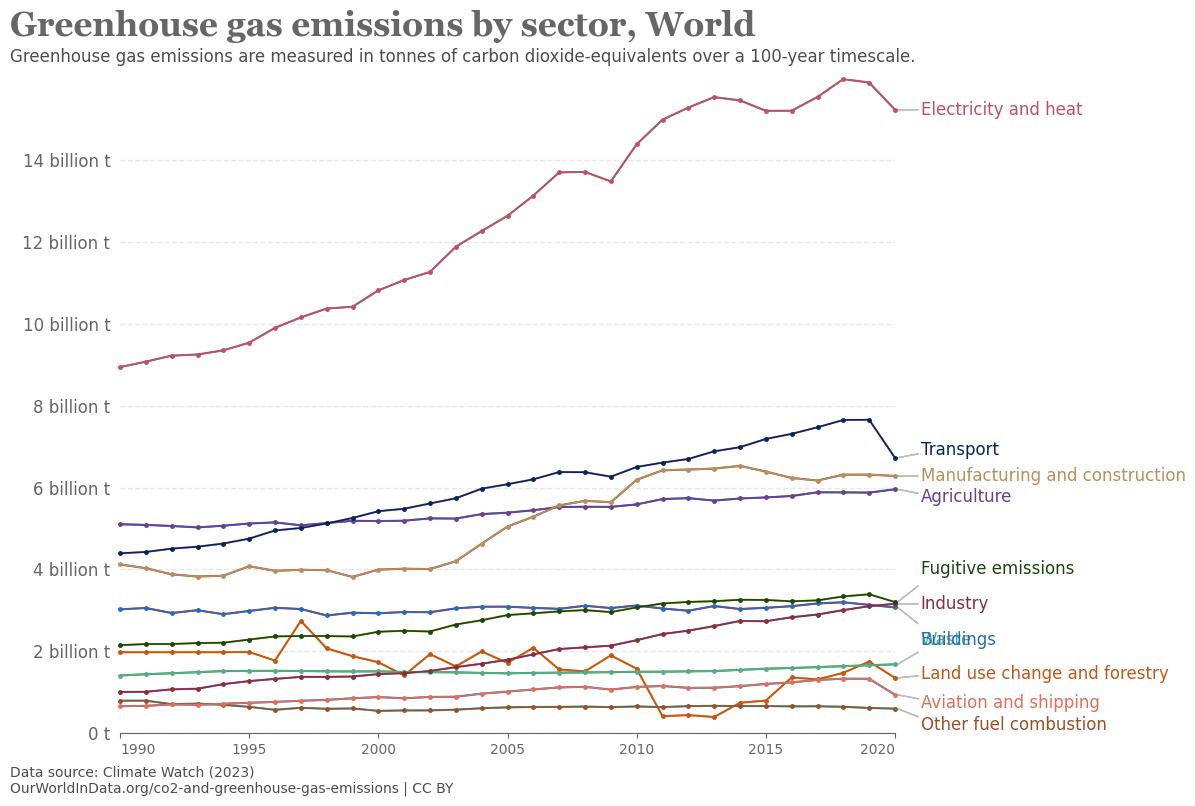

In [2]:

# Rename columns
columns = df_grouped.columns
columns_short_names = [name.replace("Greenhouse gas emissions from ", "") for name in columns]
columns_short_names = [name[0].upper() + name[1:] for name in columns_short_names]
df_grouped.columns = columns_short_names

# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY85 = "#5b5b5b"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# OurWorldInData color palette
COLOR_SCALE = [
    "#6D3E91", "#C05917", "#58AC8C", "#286BBB", "#883039", "#BC8E5A", "#00295B", "#C15065", 
    "#18470F", "#9A5129", "#E56E5A", "#A2559C", "#38AABA", "#578145", "#970046", "#00847E", 
    "#B13507", "#4C6A9C", "#CF0A66", "#00875E", "#B16214", "#8C4569", "#3B8E1D", "#D73C50"
]


# Vertical lines every 2 million tons
HLINES = np.arange(0, 16, 2)

ax = df_grouped.plot(figsize = (10, 8.5))
fig = ax.get_figure()

fig.text(
    0.015, 0.93, # (x,y) coordinates
    "Greenhouse gas emissions by sector, World",
    color=GREY40, fontname="Georgia", # Serif font
    fontsize=24, weight="bold"
)

# Subtitle
fig.text(
    0.015, 0.90, # (x,y) coordinates
    "Greenhouse gas emissions are measured in tonnes of carbon"
    " dioxide-equivalents over a 100-year timescale.",
    color=GREY30, fontsize=12,
)

# Legend
fig.text(
    0.015, 0.04, # (x,y) coordinates
    "Data source: Climate Watch (2023)\n"
    "OurWorldInData.org/co2-and-greenhouse-gas-emissions | CC BY",
    fontsize=10, color=GREY30
)

# Manually set axes range
ax.set_xlabel("")
ax.set_xlim(1990, 2020)
ax.set_ylim(0, 16)

# Keep only the bottom axis
ax.spines["left"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# X-axis: Change colors axis and label
ax.spines['bottom'].set_color(GREY40)
ax.tick_params(axis='x', colors=GREY40)
ax.xaxis.label.set_color(GREY40)

# X-Axis: Position ticks center, except for first and last
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('center')

ax.xaxis.majorTicks[0].label1.set_horizontalalignment('left')
ax.xaxis.majorTicks[6].label1.set_horizontalalignment('right')

# Y-axis: Add vertical gridlines every 2 billion tons
for h in HLINES:
    ax.axhline(h, color=GREY91, lw=1, zorder=0, linestyle="--")

# Y-Axis: Remove y ticks
ax.yaxis.set_tick_params(width=0)

# Y-axis: Change y axis labels to have Unit#
ax.set_yticklabels(
    [f"{y} billion t" if y!=0 else "0 t" for y in np.arange(0, 16, 2)], 
    fontsize=12,
    weight=500,
    color=GREY40
)

# Remove existing legend
ax.legend().remove()

# Define margin around annotation
PAD = 0.1
y_offsets = [-0.1, 0.05, 0.3, -0.4, 0, 0, +0.1, 0, +0.4, -0.2, -0.1 ]

# For each timeserie
for idx, column in enumerate(df_grouped.columns):
    # 1. Pick a Color from OurWorldInData palette
    color = COLOR_SCALE[idx]
    
    # 2. Plot each line with some round markers
    ax.plot(
        df_grouped.index, df_grouped[column], 
        color = color, label=column, marker="o", 
        markersize=2.5, lw=1.2, clip_on=False
    )
    
    # 3. Add annotation with name of each serie 
    y_end_value = df_grouped[column].iloc[-1]
    y_offset = y_offsets[idx]
    annotation_x = 2021
    annotation_y = y_end_value + y_offset
    ax.text(
        annotation_x, annotation_y + y_offset, column, 
        color=color, fontsize=12, va="center"
    )

    # 4. Add arrow between line to annotation
    line_chart_x_end = 2020 + PAD
    line_chart_y_end = y_end_value
    ax.arrow(
        line_chart_x_end,line_chart_y_end,
        1-2*PAD, y_offset,
        clip_on = False, color=GREY75
    )